<a href="https://colab.research.google.com/github/josephdufour10/stage_cristal/blob/main/tous_le_code_Joseph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# on importe le tableau sur lequel on veut travailler (j'ai trvaillé sur google colab)
from google.colab import files
uploaded = files.upload()

Saving Envoie final Jospeh.xlsx to Envoie final Jospeh.xlsx


## On va d'abord supprimer les stopwords de base avant de faire un nuage de mot pour enlever justement tous les petits mots qui n'ont pas d'impact sémantique.



In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 89.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Étape 1 : Installer les bibliothèques si ce n'est pas déjà fait
!pip install openpyxl
!python -m spacy download fr_core_news_md

# Étape 2 : Importer les bibliothèques
import pandas as pd
import spacy
from spacy.lang.fr.stop_words import STOP_WORDS

# Charger le modèle français
nlp = spacy.load('fr_core_news_md')



# Étape 3 : Fonction de lemmatisation avec suppression des stopwords et ponctuation
def lemmatize_clean(text):
    if pd.isna(text):
        return ""
    doc = nlp(str(text))
    lemmes = [
        token.lemma_ for token in doc
        if not token.is_stop            # enlever les stopwords
        and not token.is_punct          # enlever la ponctuation
        and token.is_alpha              # ne garder que les mots (pas de chiffres)
    ]
    return " ".join(lemmes)


# Charger le fichier Excel
df = pd.read_excel("")

# Étape 5 : Appliquer la fonction aux colonnes voulues
df['Mise en place (lemmatisé)'] = df['Mise en place'].apply(lemmatize_clean)
df['Théorie (lemmatisé)'] = df['Théorie'].apply(lemmatize_clean)

# Aperçu
df[['Mise en place', 'Mise en place (lemmatisé)', 'Théorie', 'Théorie (lemmatisé)']].head(10)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 MB 18.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


,Mise en place,Mise en place (lemmatisé),Théorie,Théorie (lemmatisé)
0,Donc l'idée c'est d'inviter le patient à abord...,idée inviter patient aborder venir esprit mani...,Donc ça ça repose sur des modèles théoriques e...,repose modèle théorique notion inconscient cen...
1,Donc ça c'est l'association libre du coup aprè...,association libre coup coup écoute flotter côt...,Et du coup le le modèle sous-jacent avec le fl...,coup modèle flottante pareil pareil venir asso...
2,C'est la question de l'interprétation dont j'a...,question interprétation parler manière interpr...,Donc théoriquement ça ça repose sur l'interpré...,théoriquement repose interprétation repose thé...
3,Après y a peut être une autre à laquelle je pe...,maniement transfert maniement transfert idée b...,Voilà donc ça ça se repose sur les théorisatio...,repose théorisation transfert freud considérer...
4,C'est la médiation effectivement qu'on peut tu...,médiation effectivement voir médiation faire p...,NaN,
5,Après il y a ben du coup notre technique qui a...,ben coup technique savoir cas vraiment autour ...,NaN,
6,"Pour cela, une consultation médicale est indis...",consultation médical indispensable ecg compati...,"Selon la théorie de la reconsolidation, lorsqu...",théorie reconsolidation souvenir réactiver dev...
7,"En fait, le reparentage. Quand quand une perso...",reparentage venir raconter voir vivre situatio...,A la fois on travaille l'attachement. Tu vois ...,fois travailler attachement voir disponible cl...
8,"Le moi, mon objectif, c'est de de permettre do...",objectif permettre dire charge émotionnel trop...,Après pour moi il y a mais je sais pas si ça r...,savoir répondre question question régulation é...
9,"Ouais, les devoirs. Bah en fait c'est parce qu...",ouai devoir bah apaiser apaiser passé chose ac...,Bah du coup là moi je te dirais que c'est les ...,bah coup dire exercice vraiment processus act ...


In [ ]:
# Étape 6 : Sauvegarder le DataFrame dans un fichier Excel
nom_fichier = ""
df.to_excel(nom_fichier, index=False)

files.download(nom_fichier)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# On passe à la mise en place du nuage de mots (ici on fusionne deux colonnes du dataframe, et on obtient les wordclouds pour les deux colonnes séparés, puis le wordcloud des deux colonnes fusionnées)

In [2]:
# On charge le tableau obtenu dans un dataframe
import pandas as pd
df = pd.read_excel(nom_fichier)

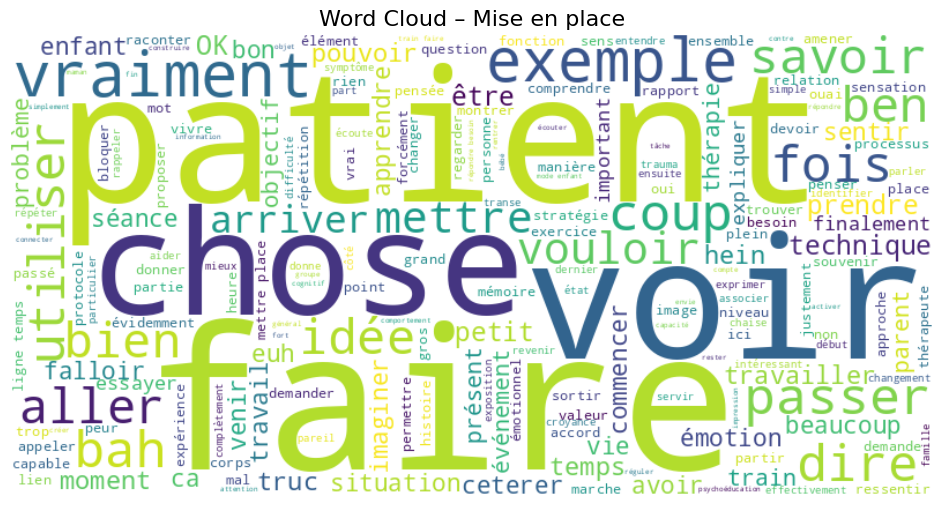

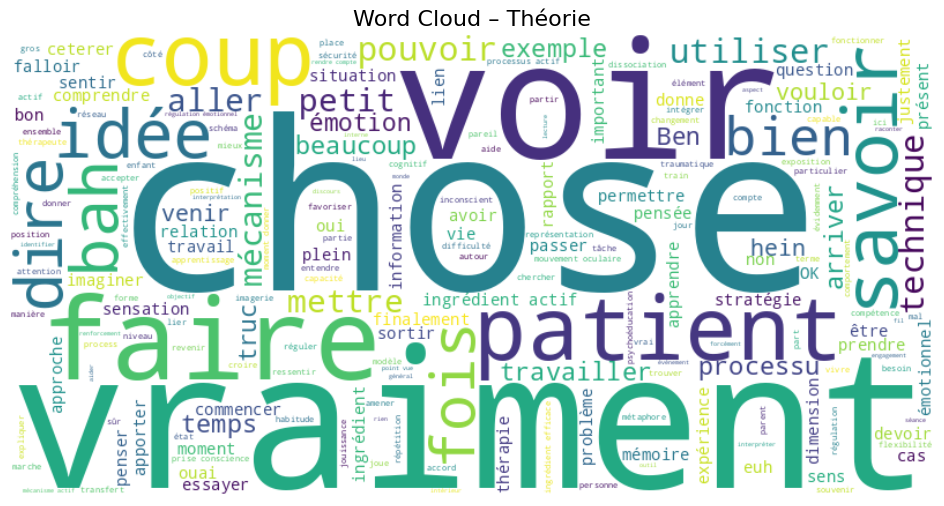

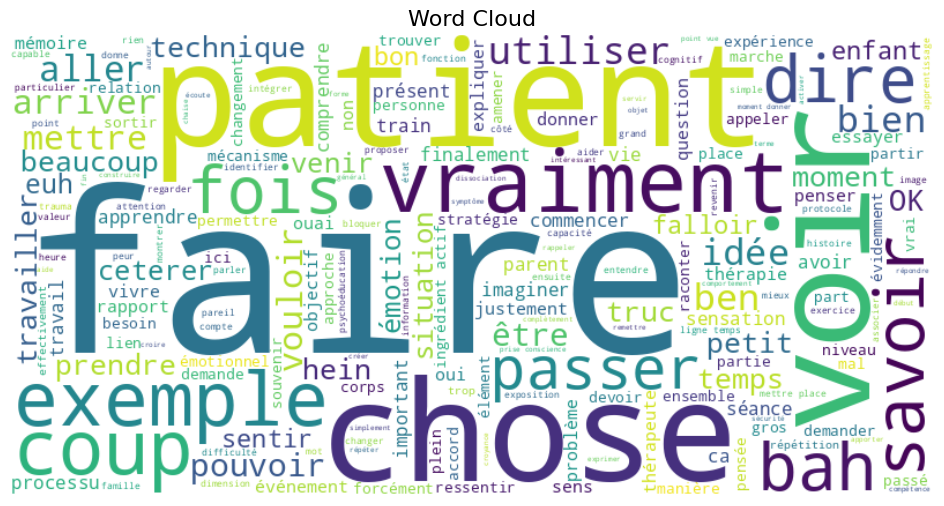

In [ ]:
# Étape 1 : Installer les bibliothèques nécessaires
!pip install wordcloud matplotlib

# Étape 2 : Importer les bibliothèques
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Étape 3 : Fusionner les textes des colonnes lemmatisées
texte_mise_en_place = " ".join(df['Mise en place (lemmatisé)'].dropna())
texte_theorie = " ".join(df['Théorie (lemmatisé)'].dropna())
texte_tout = texte_mise_en_place + " " + texte_theorie
# Étape 4 : Créer et afficher le word cloud pour "Mise en place"
wordcloud_mep = WordCloud(width=800, height=400, background_color='white').generate(texte_mise_en_place)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_mep, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud – Mise en place", fontsize=16)
plt.show()

# Étape 5 : Créer et afficher le word cloud pour "Théorie"
wordcloud_theorie = WordCloud(width=800, height=400, background_color='white').generate(texte_theorie)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_theorie, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud – Théorie", fontsize=16)
plt.show()

# Étape 6 : Créer et afficher le word cloud "texte_tout"
wordcloud_texte_tout = WordCloud(width=800, height=400, background_color='white').generate(texte_tout)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_texte_tout, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud", fontsize=16)
plt.show()


### Ici on va compter les 70 mots les plus récurrents de chaque colonne, pour constater quels sont ceux qui ont une faible valeur sémantique afin de mettre en place la liste des stopwords.

In [ ]:
from collections import Counter

# Fonction pour obtenir les 70 mots les plus fréquents dans une colonne
def get_top_words(serie, top_n=70):
    # Joindre tous les textes en un seul
    full_text = " ".join(serie.dropna())
    # Diviser en mots
    words = full_text.split()
    # Compter les occurrences
    word_freq = Counter(words)
    # Retourner les N mots les plus fréquents
    return word_freq.most_common(top_n)




# 50 mots les plus fréquents pour "Mise en place"
top_mep = get_top_words(df['Mise en place (lemmatisé)'])

# 50 mots les plus fréquents pour "Théorie"
top_theorie = get_top_words(df['Théorie (lemmatisé)'])

# Afficher les résultats

print("🔹 Mots les plus fréquents – Mise en place :")
for mot, freq in top_mep:
    print(f"{mot} : {freq}")

print("\n🔹 Mots les plus fréquents – Théorie :")
for mot, freq in top_theorie:
    print(f"{mot} : {freq}")


🔹 Mots les plus fréquents – Mise en place :
faire : 504
patient : 400
chose : 331
voir : 324
vraiment : 267
exemple : 264
bien : 200
dire : 186
passer : 185
coup : 183
utiliser : 181
mettre : 175
fois : 172
savoir : 159
bah : 158
aller : 157
prendre : 154
temps : 151
idée : 149
arriver : 132
vouloir : 132
être : 130
technique : 129
moment : 122
pouvoir : 122
enfant : 122
petit : 117
émotion : 116
beaucoup : 113
truc : 108
travailler : 101
situation : 101
vie : 100
hein : 99
train : 97
falloir : 94
ceterer : 92
sentir : 88
avoir : 87
séance : 86
apprendre : 84
venir : 83
travail : 80
euh : 78
bon : 77
important : 77
donner : 76
stratégie : 76
cas : 75
ben : 75
oui : 75
besoin : 74
sensation : 74
demander : 73
problème : 72
Ben : 72
commencer : 71
place : 70
imaginer : 70
fonction : 70
thérapie : 69
OK : 69
présent : 68
émotionnel : 67
parent : 65
non : 64
événement : 64
question : 63
essayer : 63
sens : 63

🔹 Mots les plus fréquents – Théorie :
chose : 130
vraiment : 124
faire : 121
voi

# On passe au traitement des textes : lemmatisation, suppression des stopwords, de la ponctuation et des valeurs numériques.

In [ ]:
# Étape 1 : Installer les bibliothèques si ce n'est pas déjà fait
!pip install pandas openpyxl
!python -m spacy download fr_core_news_md

# Étape 2 : Importer les bibliothèques
import pandas as pd
import spacy
from spacy.lang.fr.stop_words import STOP_WORDS

# Charger le modèle français
nlp = spacy.load('fr_core_news_md')

mots_a_supprimer = set(["faire", "voir", "exemple", "chose", "vraiment", "utiliser", "bien", "dire",
    "fois", "passer", "mettre", "bah", "savoir", "aller", "prendre", "truc", "coup", "euh",
    "moment", "vouloir", "apprendre", "temps", "être", "avoir", "falloir", "fonction",
    "ceterer", "train", "euh", "ben", "beaucoup", "oui", "demander", "venir", "petit",
    "sentir", "OK", "donner", "bon","TCC", "EMDR" , "Systémie", "Approche systémique", "Psychanalyse",
    "Approche basée sur la mentalisation", "Approche humaniste existentialiste", "Thérapie des schémas",
    "Hypnose", "Remédiation cognitive", "MOSAIC", "Reconsolidation" ,"ICV", "Entretien motivationnel"
    "EFT", "Sophro","ok", "vraiment","bien","processus","ingrédient","mécanisme","patient","technique", "du coup",
    "idée","actif","hein","ouais", "ouai","faire", "patient", "chose", "voir", "vraiment", "exemple", "bien", "dire", "passer", "coup", "utiliser", "mettre", "fois", "savoir",
    "bah", "aller", "prendre", "arriver", "être", "technique", "petit", "beaucoup", "truc", "hein", "train", "falloir" , "ceterer",
    "avoir", "séance", "euh", "bon", "donner", "cas", "ben", "oui", "Ben", "thérapie", "OK", "émotionnel", "non",
    "chose", "vraiment", "faire" , "voir", "patient", "coup", "ingrédient", "idée", "dire", "processus", "mécanisme", "mettre",
    "fois", "bien", "petit", "aller", "truc", "beaucoup", "bah", "émotionnel", "émotion", "hein", "venir", "prendre", "bon",
    "passer", "fonction", "euh" , "être", "finalement", "oui", "question", "donner", "ceterer", "donne", "prise", "important","stratégie",
    "justement", "situation", "ouai", "ici","thérapeute","thérapie","vie"])

# Étape 3 : Fonction de lemmatisation avec suppression des stopwords et ponctuation
def lemmatize_clean(text):
    if pd.isna(text):
        return ""
    doc = nlp(str(text))
    lemmes = [
        token.lemma_ for token in doc
        if not token.is_stop            # enlever les stopwords
        and not token.is_punct          # enlever la ponctuation
        and token.is_alpha              # ne garder que les mots (pas de chiffres)
        and token.lemma_.lower() not in mots_a_supprimer
    ]
    return " ".join(lemmes)




# Étape 5 : Appliquer la fonction aux colonnes voulues
df['Mise en place (lemmatisé)'] = df['Mise en place'].apply(lemmatize_clean)
df['Théorie (lemmatisé)'] = df['Théorie'].apply(lemmatize_clean)

# Aperçu
df[['Mise en place', 'Mise en place (lemmatisé)', 'Théorie', 'Théorie (lemmatisé)']].head(1)


Mise en place  \
0  Donc l'idée c'est d'inviter le patient à aborder ce qui lui vient à l'esprit voilà de manière libre alors évidemment il s'agit pas de tout dire on dit pas la personne d'être à 100% transparente honnête on n'est pas du tout dans cette dynamique là mais vraiment dans celle de lui permettre d'exprimer ce qui a fait question ce qui a fait conflit pour lui de manière à libre et on lui on l'invite à s'il y a une association d'idées qui lui vient, même si ça lui paraît incongru à l'exprimer donc voilà donc c'est à dire quand le patient commence à parler je sais pas de sa sœur et il y a un moment il y a un petit blanc un peu relancé en disant à quoi vous pensez et souvent la personne dira « ça a pas de rapport » mais dites le quand même et dans cette idée voilà que on doit vraiment accompagner le patient en le mettant évidemment à l'aise à exprimer ce qui lui traversent l'esprit même voilà des idées qui paraissent en rapport premier dans l'hypothèse que on pourrait éventuellement y trouver un rapport justement puisque ça ça viendrait mettre en en évidence des processus inconscients justement dans ces associations d'idées qu'on est habitué à inhiber justement et là il s'agirait de les désinhiber voilà donc ça c'est sur l'aspect un peu technique comment est-ce qu'on invite le patient à le faire évidemment on le fait avec parcimonie moment on on laisse la personne continuer à éviter quelque chose on voit qui le travaille mais on on tente régulièrement quand même de revenir sur cette cette ouverture pour que lui même le patient lui-même ait cette habitude d'arriver sans avoir rien préparé presque parce que c'est un peu cette idée aussi et et se laisser porter voilà alors pour aider cette technique là alors quand on est psychologue orienté par là psychanalyse on utilise pas forcément un divan quand les psychanalystes on a un divan c'est vrai que c'est l'outil du divan permet à ce que l'association libre prenne vraiment encore plus place puisque il y a non seulement il y a le regard qui est plus là donc il y a quelque chose de la rêverie on peut se laisser regarder le plafond et puis on sait pas un tableau quelque chose et il y a le lâcher du corps aussi il y a beaucoup moins dans la maîtrise de la position debout assise donc y a quelque chose qui invite à la rêverie et à voilà se cette ouverture à ses propres idées puisqu'on a cette habitude effectivement de ne pas écouter ce qu'on est en train de se dire là l'idée est de de tout dire de ce qu'on est en train de se dire au maximum en tout cas ce qu'on a envie parce qu'évidemment il n’y a pas de d'injonction à ça non plus.    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Mise en place (lemmatisé)  \
0  inviter aborder esprit manière libre évidemment agir transparent honnête dynamique permettre exprimer conflit manière libre invite association paraître incongru exprimer commencer sœur blanc relancer penser rapport accompagner évidemment aise exprimer traverser esprit paraître rapport hypothèse éventuellement trouver rapport évidence inconscient association habituer inhiber agir désinhiber aspect invite évidemment parcimonie laisse continuer éviter travailler régulièrement revenir ouverture habitude rien préparer presque port

In [ ]:
nom_fichier = ""
df.to_excel(nom_fichier, index=False)

files.download(nom_fichier)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# BERTopic

In [ ]:
!pip install gensim

In [ ]:
# Ce code permet de ne pas avoir de limite d'affichage

import pandas as pd

# Pour ne pas tronquer la largeur des colonnes (afficher large)
pd.set_option('display.max_colwidth', None)    # Affiche tout le contenu des cellules, sans limite
pd.set_option('display.width', 1000)           # Largeur max de la console
pd.set_option('display.max_columns', None)     # Affiche toutes les colonnes

In [ ]:
!pip install bertopic

In [ ]:
!pip install sentence-transformers hdbscan


### Application de bertopic sur les deux colonnes en même temps

In [ ]:
#On importe le tableau avec les colonnes traitées

from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
df = pd.read_excel("")

In [ ]:
# Ce code permet d'essayer toutes les combinaisons de paramètrages pour
# n_neighbors de 5 à 15, min_cluster_size de 3 à 11, et method entre "leaf" et
# "eom" pour choisir le meilleur paramètrage. On veut un minimum d'outliers, un
# nombre ni trop petit ni trop grand du nombre de topics, et des scores de
# cohérence et de diversité maximisés.

import pandas as pd
from umap import UMAP
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from hdbscan import HDBSCAN
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import itertools

# Préparation des documents
df['texte_combine'] = df['Mise en place (lemmatisé)'].fillna('') + " " + df['Théorie (lemmatisé)'].fillna('')
documents = df['texte_combine']
documents = documents[documents.str.strip() != ''].tolist()

# Encodage avec un modèle multilingue
embedding_model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")

# Tokenisation pour la cohérence
tokenized_docs = [doc.split() for doc in documents]
dictionary = Dictionary(tokenized_docs)
top_n = 10

# Fonction diversité
def topic_diversity(topic_words):
    all_words = [word for topic in topic_words for word in topic]
    unique_words = set(all_words)
    total_words = len(all_words)
    return len(unique_words) / total_words

# Grille d'hyperparamètres
param_grid = list(itertools.product(range(5, 15), range(3, 11), ["eom", "leaf"]))

# Boucle sur les combinaisons
for n_neighbors, min_cluster_size, method in param_grid:
    print(f"\n--- Test: n_neighbors={n_neighbors}, min_cluster_size={min_cluster_size}, method={method} ---")

    umap_model = UMAP(n_neighbors=n_neighbors, n_components=3, min_dist=0.0, metric='cosine')
    hdbscan_model = HDBSCAN(min_cluster_size=min_cluster_size, min_samples=1, metric='euclidean',
                            cluster_selection_method=method, prediction_data=True)

    topic_model = BERTopic(
        embedding_model=embedding_model,
        hdbscan_model=hdbscan_model,
        umap_model=umap_model,
        language="french",
        n_gram_range=(1, 2),
        calculate_probabilities=True,
        verbose=False
    )

    try:
        topics, probs = topic_model.fit_transform(documents)
        topic_info = topic_model.get_topics()
        topic_words = [[word for word, _ in topic[:top_n]] for topic in topic_info.values() if topic]

        coherence_model = CoherenceModel(
            topics=topic_words,
            texts=tokenized_docs,
            dictionary=dictionary,
            coherence='c_v'
        )
        coherence_score = coherence_model.get_coherence()
        diversity_score = topic_diversity(topic_words)

        n_outliers = sum(1 for t in topics if t == -1)

        print(f"Coherence Score (C_v): {coherence_score:.4f}")
        print(f"Topic Diversity: {diversity_score:.4f}")
        print(f"Nombre de topics trouvés (hors -1): {len(set(topics)) - (1 if -1 in topics else 0)}")
        print(f"Nombre de documents dans le topic -1 (outliers): {n_outliers}")
    except Exception as e:
        print(f"Erreur rencontrée : {e}")



--- Test: n_neighbors=5, min_cluster_size=3, method=eom ---
Coherence Score (C_v): 0.4003
Topic Diversity: 0.8800
Nombre de topics trouvés (hors -1): 29
Nombre de documents dans le topic -1 (outliers): 29

--- Test: n_neighbors=5, min_cluster_size=3, method=leaf ---
Coherence Score (C_v): 0.4150
Topic Diversity: 0.8562
Nombre de topics trouvés (hors -1): 31
Nombre de documents dans le topic -1 (outliers): 20

--- Test: n_neighbors=5, min_cluster_size=4, method=eom ---
Coherence Score (C_v): 0.3860
Topic Diversity: 0.8800
Nombre de topics trouvés (hors -1): 24
Nombre de documents dans le topic -1 (outliers): 15

--- Test: n_neighbors=5, min_cluster_size=4, method=leaf ---
Coherence Score (C_v): 0.3711
Topic Diversity: 0.8739
Nombre de topics trouvés (hors -1): 22
Nombre de documents dans le topic -1 (outliers): 12

--- Test: n_neighbors=5, min_cluster_size=5, method=eom ---
Coherence Score (C_v): 0.3622
Topic Diversity: 0.8667
Nombre de topics trouvés (hors -1): 14
Nombre de documents 

In [ ]:
# Une fois le meilleur paramétrage trouvé on applique ces paramètres pour appliquer bertopic
# La reproductibilité n’est pas optimale, mais elle demeure suffisamment cohérente.

import pandas as pd
from umap import UMAP
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from hdbscan import HDBSCAN

# Charger et préparer les données
df['texte_combine'] = df['Mise en place (lemmatisé)'].fillna('') + " " + df['Théorie (lemmatisé)'].fillna('')
documents = df['texte_combine']
documents = documents[documents.str.strip() != ''].tolist()

# Réduction de dimension avec UMAP
umap_model = UMAP(n_neighbors=13, n_components=3, min_dist=0.0, metric='cosine')

# Encodage avec un modèle multilingue
embedding_model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")

# Clustering avec HDBSCAN
hdbscan_model = HDBSCAN(min_cluster_size=5, min_samples=1, metric='euclidean', cluster_selection_method='eom',prediction_data=True)

# Modèle BERTopic avec n-gram jusqu'à 3
topic_model = BERTopic(
    embedding_model=embedding_model,
    hdbscan_model=hdbscan_model,
    umap_model=umap_model,
    language="french",
    n_gram_range=(1, 3),
    calculate_probabilities=True,
)

# Entraînement
topics, probs = topic_model.fit_transform(documents)

# Affichage des résultats
print(topic_model.get_topic_info())

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

# Extraire les top n mots par sujet
top_n = 10
topic_info = topic_model.get_topics()
topic_words = [[word for word, _ in topic[:top_n]] for topic in topic_info.values() if topic]

# Tokenisation des documents pour Gensim
tokenized_docs = [doc.split() for doc in documents]

# Création du dictionnaire (nécessaire pour certains types de cohérence)
dictionary = Dictionary(tokenized_docs)

# Calculer la cohérence avec la méthode C_v
coherence_model = CoherenceModel(
    topics=topic_words,
    texts=tokenized_docs,
    dictionary=dictionary,
    coherence='c_v'
)
coherence_score = coherence_model.get_coherence()
print("Coherence Score (C_v):", coherence_score)

def topic_diversity(topic_words):
    all_words = [word for topic in topic_words for word in topic]
    unique_words = set(all_words)
    total_words = len(all_words)
    return len(unique_words) / total_words

diversity_score = topic_diversity(topic_words)
print("Topic Diversity:", diversity_score)

    Topic  Count                                                  Name                                                                                                                   Representation  \
0      -1     27            -1_valeur_empathique_travailler_changement                               [valeur, empathique, travailler, changement, pouvoir, sens, imaginer, essayer, ressentir, travail]   
1       0     26                  0_événement_ligne_présent_répétition                           [événement, ligne, présent, répétition, dimension, protocole, souvenir, sensation, commencer, mémoire]   
2       1     19                             1_pensée_lieu_penser_sens                                  [pensée, lieu, penser, sens, pouvoir, interprétation, métaphore, trouver, inconscient, travail]   
3       2     14                 2_transe_image_imagerie_apprentissage                               [transe, image, imagerie, apprentissage, cognitif, profond, trouble, marche, efficace, 

# Afin d'interpréter les résultats, un tableau de proportions est établi afin de représenter la distribution de chaque thérapie au sein des topics.


In [ ]:
import pandas as pd
import numpy as np

# DataFrame initial filtré
df_resultats = df.loc[df['texte_combine'].str.strip() != '', ['Nom de la technique', 'Approche originelle']].reset_index(drop=True)

# Création du DataFrame de probabilités
n_topics = len(probs[0])  # Assure-toi que probs est bien une liste de listes
df_probas = pd.DataFrame(probs, columns=[f"proba_topic_{i}" for i in range(n_topics)])

# Filtrage des probabilités faibles
df_probas[df_probas < 0.05] = 0  # ou remplace par 0

# Construction du tableau final avec "Nom de la technique" et "Approche originelle"
df_wide = pd.concat([df_resultats[["Nom de la technique", "Approche originelle"]], df_probas], axis=1)

# Affichage
print(df_wide)

                          Nom de la technique Approche originelle  proba_topic_0  proba_topic_1  proba_topic_2  proba_topic_3  proba_topic_4  proba_topic_5  proba_topic_6  proba_topic_7  proba_topic_8  proba_topic_9  proba_topic_10  proba_topic_11
0                           Libre association        Psychanalyse       0.000000       0.266156       0.000000        0.00000       0.053991       0.120257       0.079573       0.060260       0.070531       0.000000        0.000000        0.051295
1                            Ecoute flottante        Psychanalyse       0.000000       1.000000       0.000000        0.00000       0.000000       0.000000       0.000000       0.000000       0.000000       0.000000        0.000000        0.000000
2                              Interprétation        Psychanalyse       0.000000       0.218415       0.000000        0.05265       0.052741       0.162463       0.077901       0.060066       0.070596       0.000000        0.000000        0.050216
3       

In [ ]:
df_wide.to_csv("", index=False)

In [ ]:
from google.colab import files
files.download("")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#On importe le tableau de proportion obtenu

from google.colab import files
uploaded = files.upload()

In [ ]:
# Ici on crée une colonne "topic dominant" pour indiquer le topic dans lequel
# chaque thérapie a le pourcetage d'appartenance le plus élevé.

import pandas as pd  # Charger le fichier CSV
df = pd.read_csv("")  # Identifier les colonnes contenant les probabilités de topics
proba_columns = [col for col in df.columns if col.startswith("proba_topic_")]  # Trouver pour chaque ligne le topic avec la probabilité maximale
df["topic_dominant"] = df[proba_columns].idxmax(axis=1)  # Extraire uniquement le numéro du topic
df["topic_dominant"] = df["topic_dominant"].str.extract(r"proba_topic_(\d+)").astype(int)  # Sauvegarder le nouveau DataFrame dans un fichier CSV
df.to_csv("df_with_dominant_topic_deux_colonnes_11_topics.csv", index=False)

In [ ]:
from google.colab import files
files.download("")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Distribution des thérapies dans leur topic dominant

In [ ]:
df["Technique_Approche"] = df["Nom de la technique"] + " (" + df["Approche originelle"] + ")"

# Grouper par topic et récupérer les valeurs sans doublons
grouped = df.groupby("topic_dominant")["Technique_Approche"].apply(lambda x: list(sorted(set(x))))

# Créer un DataFrame où chaque colonne est un topic
max_len = grouped.apply(len).max()
pivot_df = pd.DataFrame()

for topic, values in grouped.items():
    # Compléter avec des chaînes vides pour égaliser la hauteur
    padded_values = values + [""] * (max_len - len(values))
    pivot_df[f"Topic_{topic}"] = padded_values

# Afficher ou sauvegarder
print(pivot_df)

                                                                      Topic_0                                                                         Topic_1                                                              Topic_2                                                Topic_3                                                               Topic_4                                                                                    Topic_5                                          Topic_6                                              Topic_7                                                                                                           Topic_8                                          Topic_9                          Topic_10                                                                              Topic_11                       Topic_12                                          Topic_13                                                             Topic_14  \
0                  

In [ ]:
# Sauvegarde correcte avec l'extension .csv
pivot_df.to_csv("", index=False)

# Téléchargement depuis Colab
from google.colab import files
files.download("")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# On charge le tableau des proportions avec le topic dominant d'indiqué

from google.colab import files
uploaded = files.upload()

Saving texte_lemmatise_après_nuage_finall.xlsx to texte_lemmatise_après_nuage_finall (2).xlsx


### On crée ici le tableau répertoriant le topic, l'approche, la thérapie et son % d'appartenance au topic.

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

# Charger les données
df = pd.read_csv("")

# Supprimer les colonnes inutiles
df = df.drop(columns=["Unnamed: 31", "topic_dom"], errors='ignore')

# Extraire les noms des topics (colonnes entre la 3e et l’avant-dernière)
topic_names = df.columns[2:-1].tolist()

# Fonction pour obtenir le nom du topic dominant et son pourcentage
def get_topic_info(row):
    topic_index = row["topic_dominant"]
    topic_name = topic_names[topic_index]
    topic_percent = row[topic_name]
    return pd.Series([topic_name, topic_percent])

# Appliquer la fonction
df[["Nom du topic", "% d'appartenance"]] = df.apply(get_topic_info, axis=1)

# Garder uniquement les colonnes demandées
df_final = df[["Nom du topic", "Nom de la technique", "Approche originelle", "% d'appartenance"]]

# Trier par nom du topic
df_final = df_final.sort_values(by="Nom du topic").reset_index(drop=True)

# Afficher les premières lignes
df_final.head()

final_df.to_csv('techniques_par_topic_triees.csv', index=False, float_format="%.4f")
from google.colab import files
files.download("techniques_par_topic_triees.csv")

,Nom du topic,Nom de la technique,Approche originelle,% d'appartenance
0,Accordage relationnel et régulation mutuelle,Restauration,Remédiation cognitive,1.000000
1,Accordage relationnel et régulation mutuelle,Floatback-pont d'affect,EMDR,0.052808
2,Accordage relationnel et régulation mutuelle,Indices de rappel,TCC-Alexis,0.052158
3,Accordage relationnel et régulation mutuelle,Accordage,ICV,1.000000
4,Accordage relationnel et régulation mutuelle,Feedback,ICV,1.000000


# Même procédure pour chacune des colonnes séparement

### Application de bertopic sur la colonne "Mise en place (lemmatisé)"



In [ ]:
# 📚 Étape 2 : Importer les bibliothèques
import pandas as pd
from umap import UMAP
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from hdbscan import HDBSCAN


# 🧹 Étape 4 : Préparer les textes
documents = df['Mise en place (lemmatisé)'].dropna()
documents = documents[documents.str.strip() != ''].tolist()

# Réduction de dimension avec UMAP
umap_model = UMAP(n_neighbors=13, n_components=3, min_dist=0.0, metric='cosine')

# 🤖 Étape 5 : Définir le modèle d'embedding
embedding_model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")

# 🧱 Étape 6 : Définir HDBSCAN comme modèle de clustering
hdbscan_model = HDBSCAN(min_cluster_size=6, min_samples=1, metric='euclidean', cluster_selection_method='eom',prediction_data=True)

# 🧠 Étape 7 : Créer et entraîner le modèle BERTopic
topic_model = BERTopic(
    embedding_model=embedding_model,
    hdbscan_model=hdbscan_model,
    umap_model=umap_model,
    language="french",
    n_gram_range=(1, 2),
    calculate_probabilities=True,
)

topics, probs = topic_model.fit_transform(documents)

# Aperçu des topics
print(topic_model.get_topic_info())

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

# Extraire les top n mots par sujet
top_n = 10
topic_info = topic_model.get_topics()
topic_words = [[word for word, _ in topic[:top_n]] for topic in topic_info.values() if topic]

# Tokenisation des documents pour Gensim
tokenized_docs = [doc.split() for doc in documents]

# Création du dictionnaire (nécessaire pour certains types de cohérence)
dictionary = Dictionary(tokenized_docs)

# Calculer la cohérence avec la méthode C_v
coherence_model = CoherenceModel(
    topics=topic_words,
    texts=tokenized_docs,
    dictionary=dictionary,
    coherence='c_v'
)
coherence_score = coherence_model.get_coherence()
print("Coherence Score (C_v):", coherence_score)

def topic_diversity(topic_words):
    all_words = [word for topic in topic_words for word in topic]
    unique_words = set(all_words)
    total_words = len(all_words)
    return len(unique_words) / total_words

diversity_score = topic_diversity(topic_words)
print("Topic Diversity:", diversity_score)

    Topic  Count                                              Name                                                                                                           Representation  \
0      -1     28                -1_transe_externe_mémoire_cognitif                            [transe, externe, mémoire, cognitif, rappeler, interne, imaginer, comprendre, aide, efficace]   
1       0     25                        0_pensée_lieu_sens_pouvoir                                     [pensée, lieu, sens, pouvoir, travail, écoute, hypnose, engagement, sécure, écouter]   
2       1     14                  1_famille_parent_enfant_familial                                      [famille, parent, enfant, familial, relation, croyance, membre, maman, objet, mère]   
3       2     13             2_événement_protocole_ligne_ressource                               [événement, protocole, ligne, ressource, bébé, commencer, souvenir, jour, trauma, mémoire]   
4       3     12                      3_image

In [ ]:
import pandas as pd
import numpy as np

# DataFrame initial filtré
df_resultats = df.loc[df['Mise en place (lemmatisé)'].str.strip() != '', ['Nom de la technique', 'Approche originelle']].reset_index(drop=True)

# Création du DataFrame de probabilités
n_topics = len(probs[0])  # Assure-toi que probs est bien une liste de listes
df_probas = pd.DataFrame(probs, columns=[f"proba_topic_{i}" for i in range(n_topics)])

# Filtrage des probabilités faibles
df_probas[df_probas < 0.05] = 0  # ou remplace par 0

# Construction du tableau final avec "Nom de la technique" et "Approche originelle"
df_wide_mise_en_place = pd.concat([df_resultats[["Nom de la technique", "Approche originelle"]], df_probas], axis=1)

# Affichage
print(df_wide_mise_en_place)

                          Nom de la technique Approche originelle  proba_topic_0  proba_topic_1  proba_topic_2  proba_topic_3  proba_topic_4  proba_topic_5  proba_topic_6  proba_topic_7  proba_topic_8  proba_topic_9  proba_topic_10  proba_topic_11
0                           Libre association        Psychanalyse            1.0            0.0       0.000000       0.000000            0.0       0.000000            0.0       0.000000            0.0       0.000000        0.000000        0.000000
1                            Ecoute flottante        Psychanalyse            1.0            0.0       0.000000       0.000000            0.0       0.000000            0.0       0.000000            0.0       0.000000        0.000000        0.000000
2                              Interprétation        Psychanalyse            1.0            0.0       0.000000       0.000000            0.0       0.000000            0.0       0.000000            0.0       0.000000        0.000000        0.000000
3       

In [ ]:
df_wide_mise_en_place.to_csv("df_wide_col_mise_en_place.csv", index=False)

In [ ]:
from google.colab import files
files.download("df_wide_col_mise_en_place.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving df_wide_mise_en_place (1).csv to df_wide_mise_en_place (1) (1).csv


In [ ]:
import pandas as pd  # Charger le fichier CSV
df = pd.read_csv("df_wide_col_mise_en_place.csv")  # Identifier les colonnes contenant les probabilités de topics
proba_columns = [col for col in df.columns if col.startswith("proba_topic_")]  # Trouver pour chaque ligne le topic avec la probabilité maximale
df["topic_dominant"] = df[proba_columns].idxmax(axis=1)  # Extraire uniquement le numéro du topic
df["topic_dominant"] = df["topic_dominant"].str.extract(r"proba_topic_(\d+)").astype(int)  # Sauvegarder le nouveau DataFrame dans un fichier CSV
df.to_csv("df_col_mise_en_place_with_dominant_topic.csv", index=False)

In [ ]:
files.download("df_col_mise_en_place_with_dominant_topic.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df["Technique_Approche"] = df["Nom de la technique"] + " (" + df["Approche originelle"] + ")"

# Grouper par topic et récupérer les valeurs sans doublons
grouped = df.groupby("topic_dominant")["Technique_Approche"].apply(lambda x: list(sorted(set(x))))

# Créer un DataFrame où chaque colonne est un topic
max_len = grouped.apply(len).max()
pivot_df_mise_en_place = pd.DataFrame()

for topic, values in grouped.items():
    # Compléter avec des chaînes vides pour égaliser la hauteur
    padded_values = values + [""] * (max_len - len(values))
    pivot_df_mise_en_place[f"Topic_{topic}"] = padded_values

# Afficher ou sauvegarder
print(pivot_df_mise_en_place)

                                                                                                             Topic_0                                                                    Topic_1                                                              Topic_2                                                                                  Topic_3                                                               Topic_4                                                     Topic_5                                                              Topic_6                                              Topic_7                                                               Topic_8                                                                         Topic_9                                                                                   Topic_10                                                       Topic_11
0                                                                                             

In [ ]:
# Sauvegarde correcte avec l'extension .csv
pivot_df_mise_en_place.to_csv("pivot_df_col_mise_en_place.csv", index=False)

# Téléchargement depuis Colab
from google.colab import files
files.download("pivot_df_col_mise_en_place.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df = pd.read_excel("texte_lemmatise_après_nuage_finall (2).xlsx")

### Application de bertopic sur la colonne "Théorie (lemmatisé)" seulement

In [ ]:
# 📚 Étape 2 : Importer les bibliothèques
import pandas as pd
from umap import UMAP
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from hdbscan import HDBSCAN

# 🧹 Étape 3 : Charger et filtrer les données
df = df[df["Théorie (lemmatisé)"].notna()]                   # supprimer les lignes avec NaN
df = df[df["Théorie (lemmatisé)"].str.strip() != ""]         # supprimer les lignes vides

# 🧹 Étape 4 : Préparer les textes
documents = df['Théorie (lemmatisé)'].tolist()

# Réduction de dimension avec UMAP
umap_model = UMAP(n_neighbors=13, n_components=3, min_dist=0.0, metric='cosine')

# 🤖 Étape 5 : Définir le modèle d'embedding
embedding_model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")

# 🧱 Étape 6 : Définir HDBSCAN comme modèle de clustering
hdbscan_model = HDBSCAN(min_cluster_size=6, min_samples=1, metric='euclidean', cluster_selection_method='eom',prediction_data=True)

# 🧠 Étape 7 : Créer et entraîner le modèle BERTopic
topic_model = BERTopic(
    embedding_model=embedding_model,
    hdbscan_model=hdbscan_model,
    umap_model=umap_model,
    language="french",
    n_gram_range=(1, 2),
    calculate_probabilities=True,
)

topics, probs = topic_model.fit_transform(documents)

# Aperçu des topics
print(topic_model.get_topic_info())

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

# Extraire les top n mots par sujet
top_n = 10
topic_info = topic_model.get_topics()
topic_words = [[word for word, _ in topic[:top_n]] for topic in topic_info.values() if topic]

# Tokenisation des documents pour Gensim
tokenized_docs = [doc.split() for doc in documents]

# Création du dictionnaire (nécessaire pour certains types de cohérence)
dictionary = Dictionary(tokenized_docs)

# Calculer la cohérence avec la méthode C_v
coherence_model = CoherenceModel(
    topics=topic_words,
    texts=tokenized_docs,
    dictionary=dictionary,
    coherence='c_v'
)
coherence_score = coherence_model.get_coherence()
print("Coherence Score (C_v):", coherence_score)

def topic_diversity(topic_words):
    all_words = [word for topic in topic_words for word in topic]
    unique_words = set(all_words)
    total_words = len(all_words)
    return len(unique_words) / total_words

diversity_score = topic_diversity(topic_words)
print("Topic Diversity:", diversity_score)


   Topic  Count                                         Name                                                                                                          Representation  \
0     -1      9       -1_expérience_hygiène_chambre_présence                    [expérience, hygiène, chambre, présence, différenciation, ancrer, travail, habitude, croire, réseau]   
1      0     41             0_pensée_pouvoir_cognitif_penser                [pensée, pouvoir, cognitif, penser, imaginer, information, travailler, compte, apprentissage, commencer]   
2      1     25           1_travailler_métaphore_compte_fils                          [travailler, métaphore, compte, fils, fontaine, changement, accepter, tâche, motivation, sens]   
3      2     17      2_relation_dimension_régulation_réguler                  [relation, dimension, régulation, réguler, aide, engagement, compétence, enfant, ajuster, reparentage]   
4      3     15  3_conscience_expérience_sens_transformation               [cons

In [ ]:
import pandas as pd
import numpy as np

# DataFrame initial filtré
df_resultats = df.loc[df['Théorie (lemmatisé)'].str.strip() != '', ['Nom de la technique', 'Approche originelle']].reset_index(drop=True)

# Création du DataFrame de probabilités
n_topics = len(probs[0])  # Assure-toi que probs est bien une liste de listes
df_probas = pd.DataFrame(probs, columns=[f"proba_topic_{i}" for i in range(n_topics)])

# Filtrage des probabilités faibles
df_probas[df_probas < 0.05] = 0  # ou remplace par 0

# Construction du tableau final avec "Nom de la technique" et "Approche originelle"
df_wide_théorie = pd.concat([df_resultats[["Nom de la technique", "Approche originelle"]], df_probas], axis=1)

# Affichage
print(df_wide_théorie)

                          Nom de la technique Approche originelle  proba_topic_0  proba_topic_1  proba_topic_2  proba_topic_3  proba_topic_4  proba_topic_5  proba_topic_6  proba_topic_7
0                           Libre association        Psychanalyse       0.000000       0.000000       0.000000       0.000000       1.000000       0.000000       0.000000       0.000000
1                            Ecoute flottante        Psychanalyse       0.307623       0.089299       0.065231       0.119505       0.113645       0.081349       0.086022       0.106101
2                              Interprétation        Psychanalyse       0.000000       0.000000       0.000000       0.000000       1.000000       0.000000       0.000000       0.000000
3                  Transfert-contre/transfert        Psychanalyse       0.000000       0.000000       0.000000       0.000000       1.000000       0.000000       0.000000       0.000000
4                 Exposition sous propronolol     Reconsolidation     

In [ ]:
df_wide_théorie.to_csv("df_col_wide_théorie.csv", index=False)

In [ ]:
from google.colab import files
files.download("df_col_wide_théorie.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving df_col_wide_théorie.csv to df_col_wide_théorie (1).csv


In [ ]:
import pandas as pd  # Charger le fichier CSV
df = pd.read_csv("df_col_wide_théorie (1).csv")  # Identifier les colonnes contenant les probabilités de topics
proba_columns = [col for col in df.columns if col.startswith("proba_topic_")]  # Trouver pour chaque ligne le topic avec la probabilité maximale
df["topic_dominant"] = df[proba_columns].idxmax(axis=1)  # Extraire uniquement le numéro du topic
df["topic_dominant"] = df["topic_dominant"].str.extract(r"proba_topic_(\d+)").astype(int)  # Sauvegarder le nouveau DataFrame dans un fichier CSV
df.to_csv("df_col_théorie_with_dominant_topic_final.csv", index=False)

In [ ]:
from google.colab import files
files.download("df_col_théorie_with_dominant_topic_final.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df["Technique_Approche"] = df["Nom de la technique"] + " (" + df["Approche originelle"] + ")"

# Grouper par topic et récupérer les valeurs sans doublons
grouped = df.groupby("topic_dominant")["Technique_Approche"].apply(lambda x: list(sorted(set(x))))

# Créer un DataFrame où chaque colonne est un topic
max_len = grouped.apply(len).max()
pivot_df_théorie = pd.DataFrame()

for topic, values in grouped.items():
    # Compléter avec des chaînes vides pour égaliser la hauteur
    padded_values = values + [""] * (max_len - len(values))
    pivot_df_théorie[f"Topic_{topic}"] = padded_values

# Afficher ou sauvegarder
print(pivot_df_théorie)

                                                                                                             Topic_0                                                               Topic_1                                                     Topic_2                                                                                    Topic_3                                                              Topic_4                                                                         Topic_5                                                                         Topic_6                                                              Topic_7
0                                                                                                  Alliance (MOSAIC)                                      Activation comportementale (TCC)                                 5-4-3-2-1 ou spirale (EMDR)                                                                   Affrimation de soi (TCC)                           

In [ ]:
# Sauvegarde correcte avec l'extension .csv
pivot_df_théorie.to_csv("pivot_df__col_théorie.csv", index=False)

# Téléchargement depuis Colab
from google.colab import files
files.download("pivot_df__col_théorie.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>